<h1 align=center><font size = 5>Clustering of Credit Card Customers</font></h1>

# Import Library and Dataset

In [1]:
# Import library untuk mengolah data
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk modeilng
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Import dataset
df = pd.read_csv("D:\data set\Credit Card Dataset for Clustering.csv")

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Exploration

In [3]:
# Cek data type dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Menampilkan jumlah variabel yang memiliki missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Hasil output diatas menunjukkan bahwa dataset yang digunakan mengandung missing value pada variabel 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENT'

In [5]:
# Menampilkan descriptive statistics dari data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


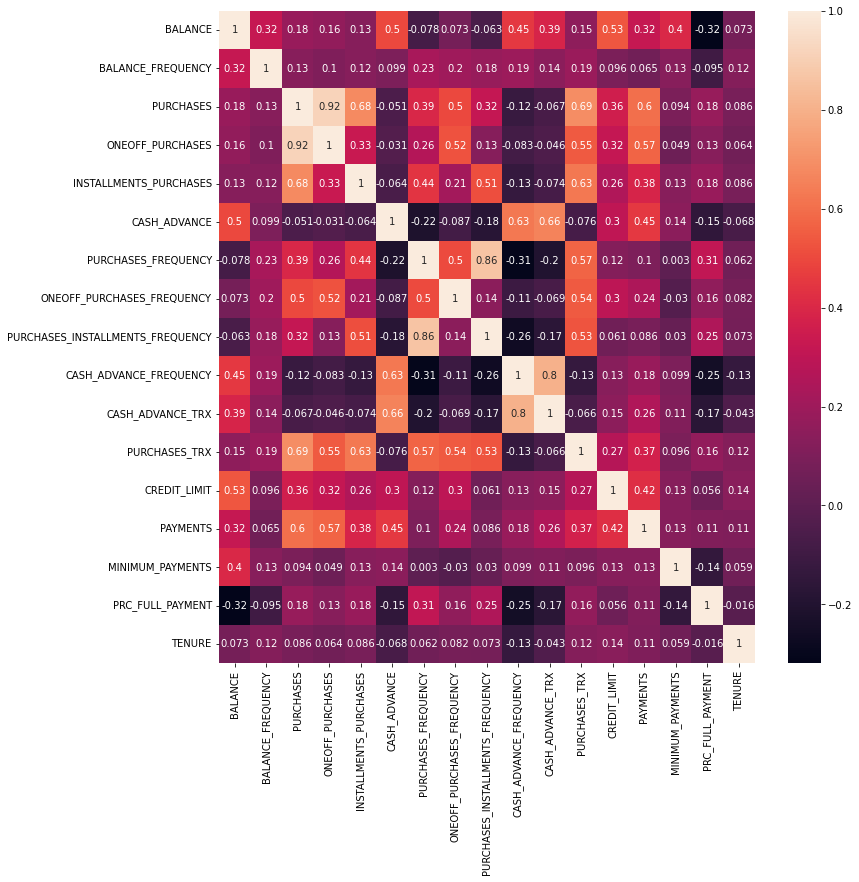

In [6]:
# Melihat korelasi antar variabel
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

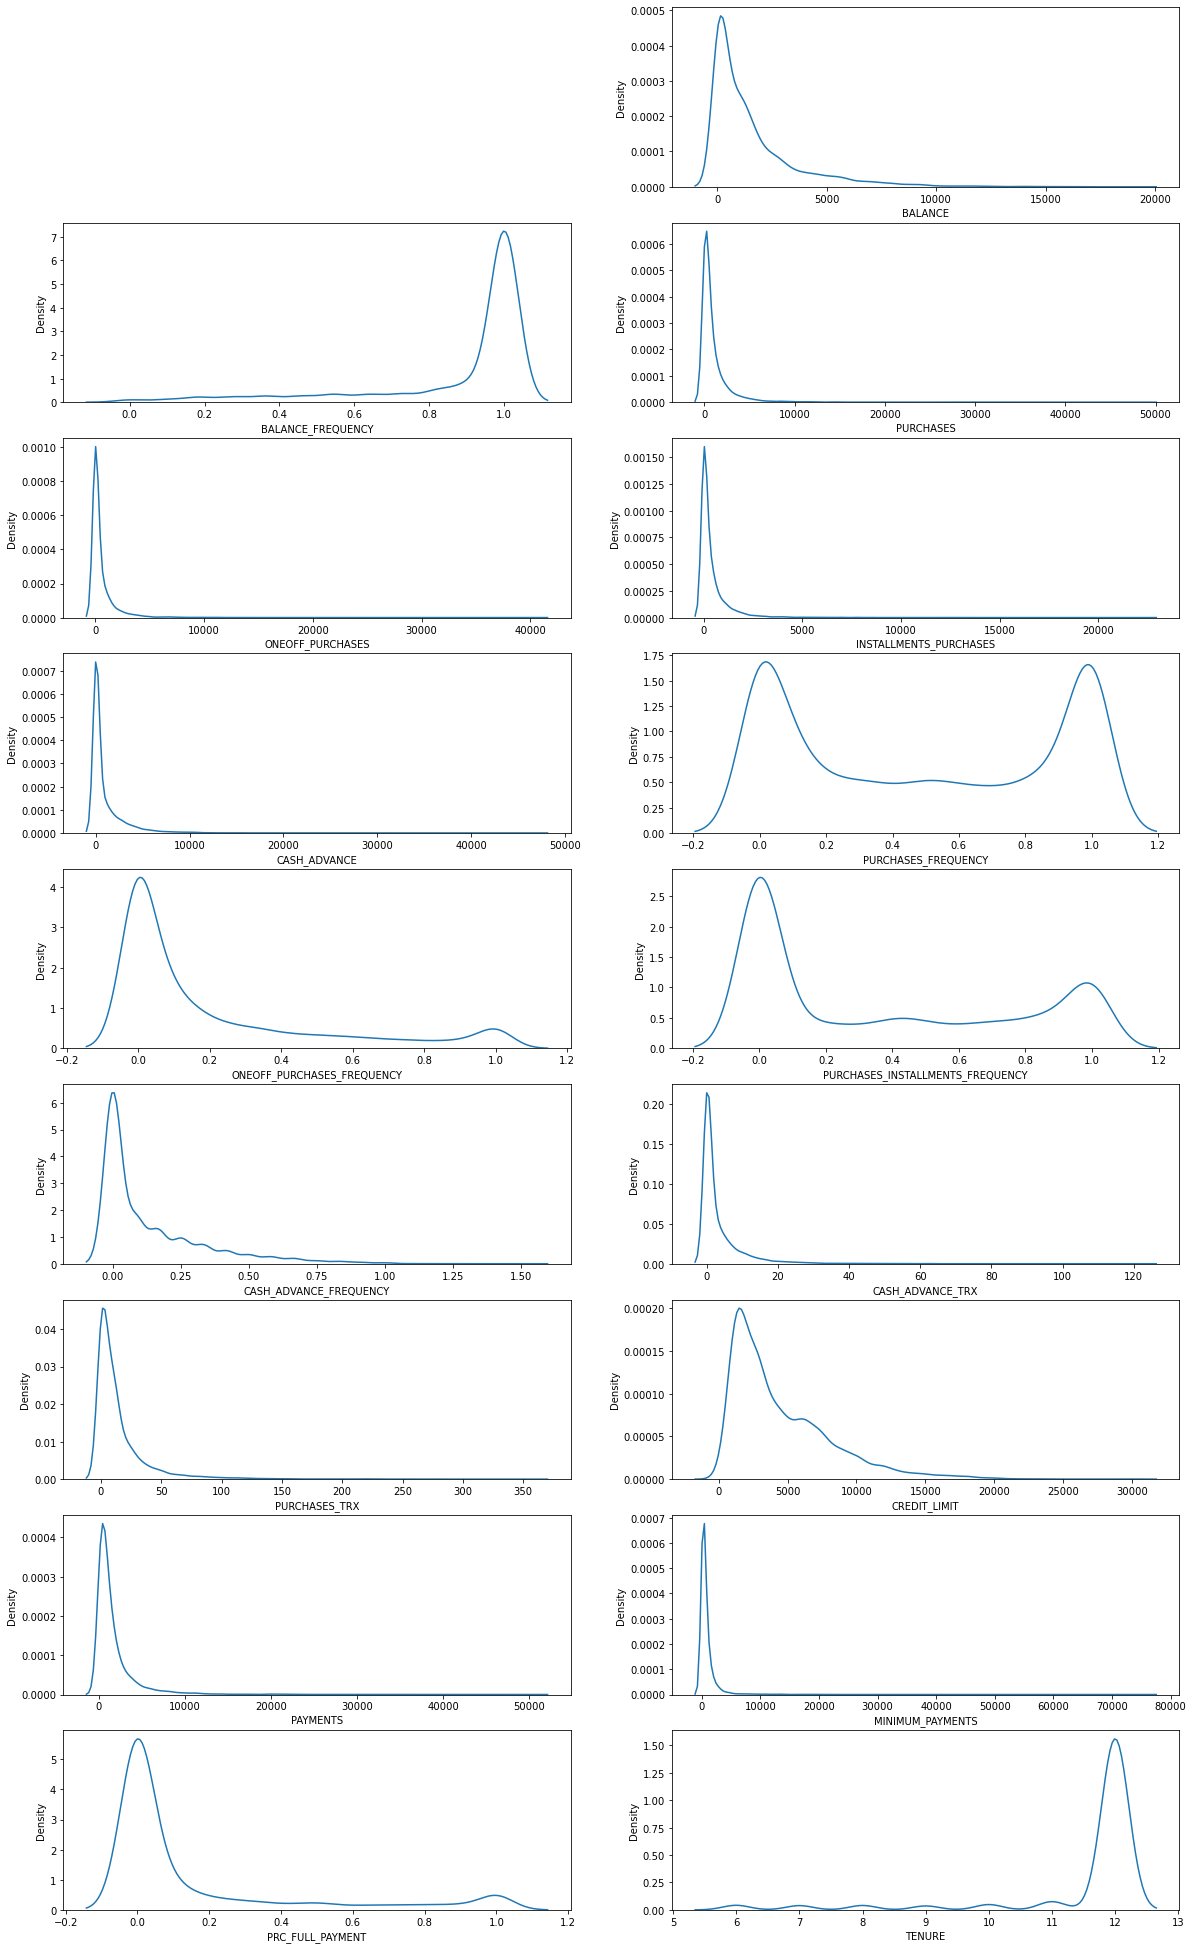

In [7]:
# Melihat distribusi persebaran data
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

# Data Pre-processing

Hasil eksplorasi data di atas ditemukan dua permasalahan yang terdapat pada data yaitu :
   1. Missing Value 
   2. Data terdistribusi secara skewness

Untuk menangani kedua permasalahan tersebut maka perlu dilakukan pengolahan data untuk menghandling missing value dan unskew dataset dengan log transformation.

## Handling missing value

In [8]:
# Drop missing value pada variabel 'CREDIT_LIMIT'
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [9]:
# Mengganti missing value pada variabel 'MINIMUM_PAYMENTS' menggunakan median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Terdapat dua metode handling missing value yang digunakan yaitu mengeliminasi missing value dan mengganti missing value dengan median. Eliminasi missing value pada variabel 'CREDIT_LIMIT' dikarenakan hanya terdapat satu data saja yang memiliki missing value. Sedangkan handling pada variabel 'MINIMUM_PAYMENTS' dilakukan dengan menggisi nilai missing value dengan central tendency measures yaitu median.

## Unskew dataset

In [10]:
# Menghilangkan variabel 'CUST_ID'
data = df.drop(['CUST_ID'], axis=1)

In [11]:
# Mendefinisikan kolom yang akan dilakukan log transformation
kolom = ['BALANCE'
         , 'BALANCE_FREQUENCY'
         , 'PURCHASES'
         , 'ONEOFF_PURCHASES'
         , 'INSTALLMENTS_PURCHASES'
         , 'CASH_ADVANCE'
         , 'ONEOFF_PURCHASES_FREQUENCY'
         , 'PURCHASES_INSTALLMENTS_FREQUENCY'
         , 'CASH_ADVANCE_FREQUENCY'
         , 'CASH_ADVANCE_TRX'
         , 'PURCHASES_TRX'
         , 'CREDIT_LIMIT'
         , 'PAYMENTS'
         , 'MINIMUM_PAYMENTS'
         , 'PRC_FULL_PAYMENT'
         , 'TENURE']

In [12]:
# Melakukan log transformation
for i in kolom:
    data[kolom] = np.log(1 + data[kolom])

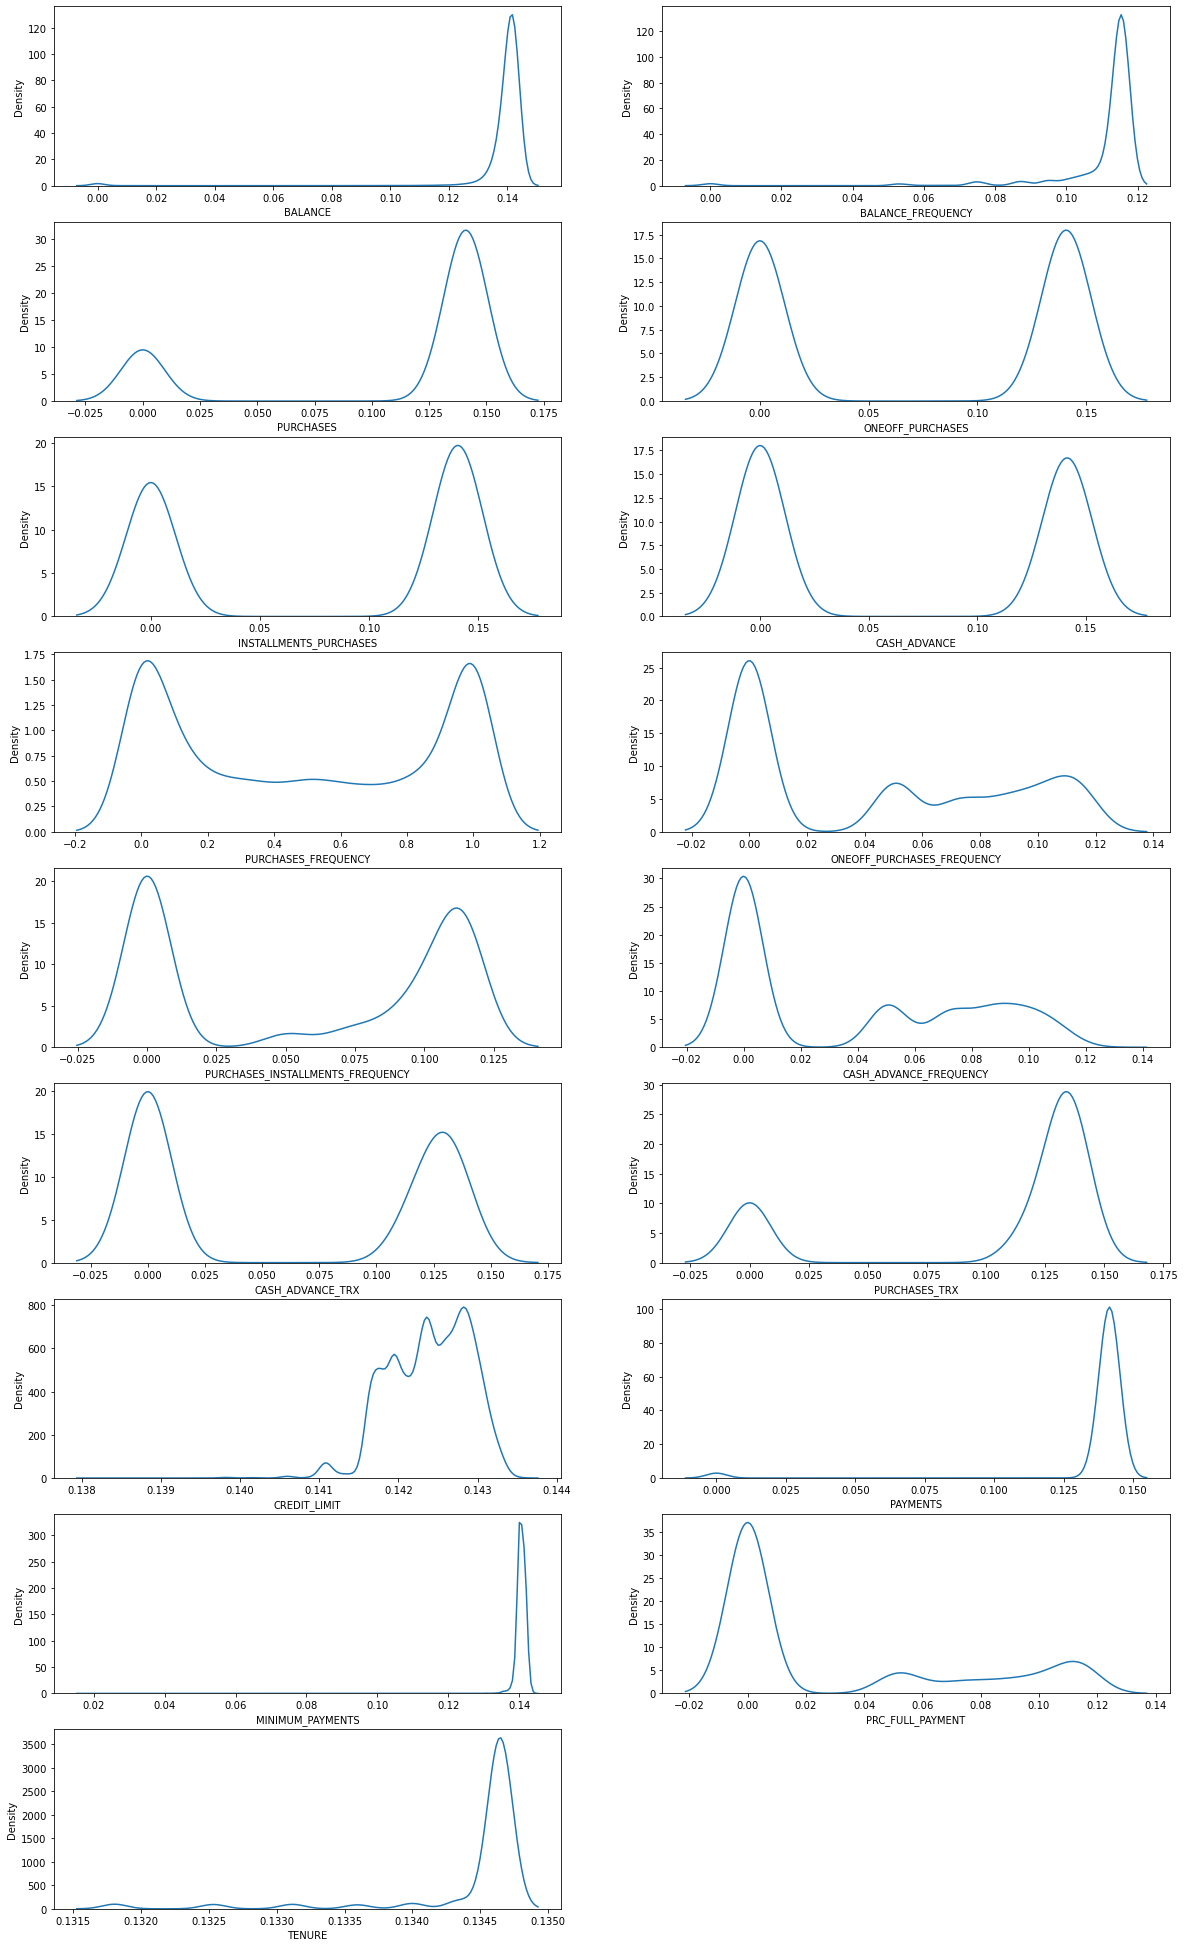

In [13]:
# Melihat distribusi persebaran data setelah log transformation
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [14]:
# Transformasi data menjadi 2 dimensi
pca = PCA(n_components=0.95)
data_red = pca.fit_transform(data)

# Model Development

## Menentukan nilai K-Means

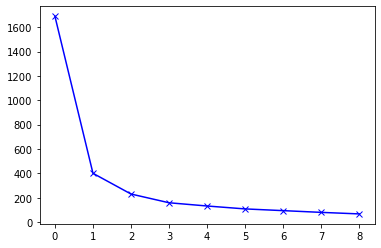

In [15]:
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(data_red)
    cost.append(kmean.inertia_) 

plt.plot(cost, 'bx-')

Dengan menggunakan Elbow Method perolehan nilai K yang paling optimal masih kurang terlihat jelas berada pada nilai antara 1, 2, atau 3. Untuk memastikannya dapat menggunakan Silhouette score untuk memperoleh nilai K yang memberikan nilai yang paling mendekati 1.

In [16]:
silhouette_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    model.fit(data_red)

    print("Calculating silhouette coefficient..")
    silhouette_scores.append(silhouette_score(data_red, model.labels_))

Clustering with n_clusters=2
Calculating silhouette coefficient..
Clustering with n_clusters=3
Calculating silhouette coefficient..
Clustering with n_clusters=4
Calculating silhouette coefficient..
Clustering with n_clusters=5
Calculating silhouette coefficient..
Clustering with n_clusters=6
Calculating silhouette coefficient..
Clustering with n_clusters=7
Calculating silhouette coefficient..
Clustering with n_clusters=8
Calculating silhouette coefficient..
Clustering with n_clusters=9
Calculating silhouette coefficient..
Clustering with n_clusters=10
Calculating silhouette coefficient..


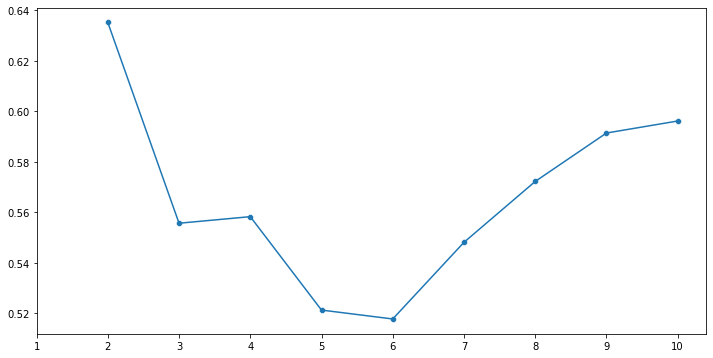

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores)
sns.scatterplot(x=range(2, 11), y=silhouette_scores)
plt.xticks(range(1, 11))
plt.show()

Hasil Silhouette score di atas menunjukkan bahwa K dengan nilai 2 memberikan score paling tinggi. Sehingga untuk melakukan modeling classification kita dapat menentukan jumlah cluster pada modeling adalah 2 cluster.

## Modeling

In [18]:
kmean= KMeans(2)
kmean.fit(data_red)
labels=kmean.labels_

In [19]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.137804,0.112353,0.139219,0.000000,0.139219,0.000000,0.166667,0.000000,0.050211,0.000000,0.000000,0.124082,0.141649,0.140173,0.139731,0.000000,0.134647,1.0
1,0.142425,0.114098,0.000000,0.000000,0.000000,0.142813,0.000000,0.000000,0.000000,0.084591,0.129540,0.000000,0.142856,0.142568,0.141701,0.081077,0.134647,1.0
2,0.142273,0.115584,0.141449,0.141449,0.000000,0.000000,1.000000,0.115584,0.000000,0.000000,0.000000,0.134647,0.142891,0.141271,0.141278,0.000000,0.134647,0.0
3,0.142012,0.107731,0.141940,0.141940,0.000000,0.140195,0.083333,0.050211,0.000000,0.050211,0.115584,0.115584,0.142891,0.000000,0.140639,0.000000,0.134647,1.0
4,0.141494,0.115584,0.135556,0.135556,0.000000,0.000000,0.083333,0.050211,0.000000,0.000000,0.000000,0.115584,0.141783,0.141343,0.140386,0.000000,0.134647,1.0


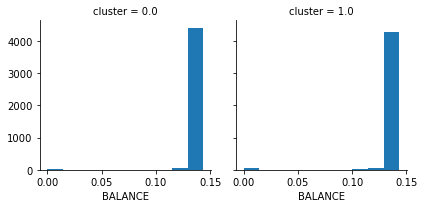

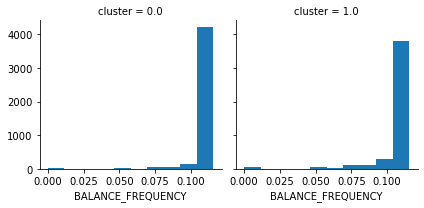

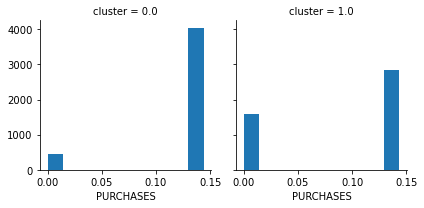

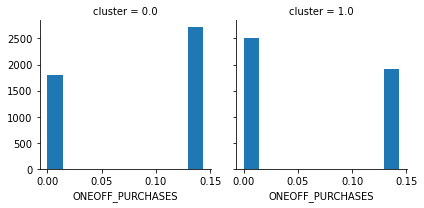

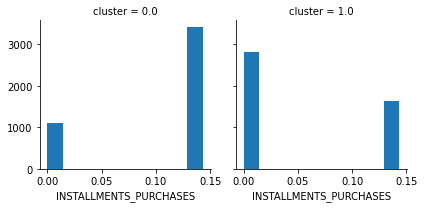

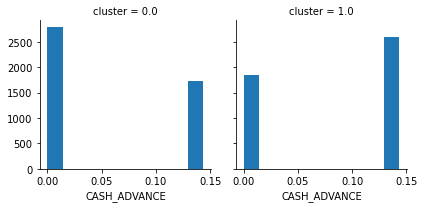

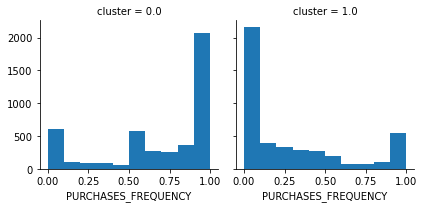

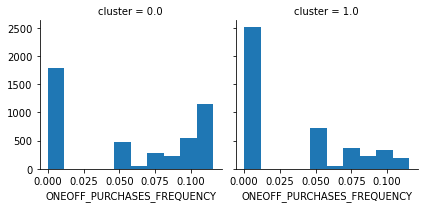

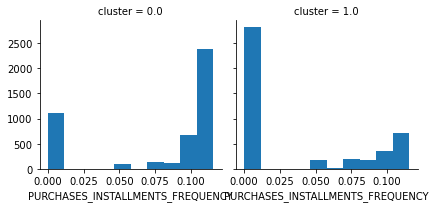

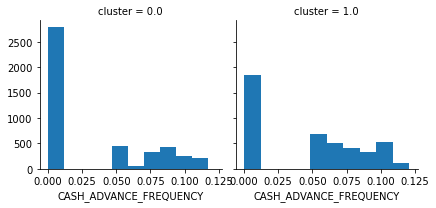

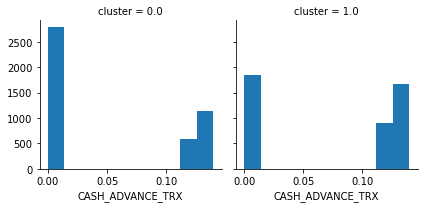

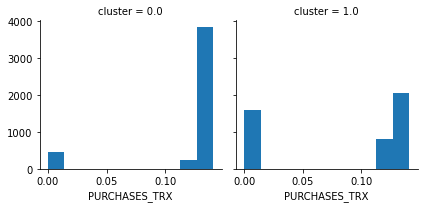

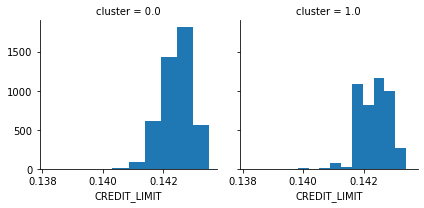

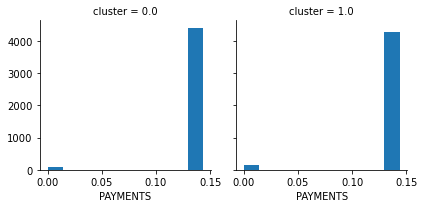

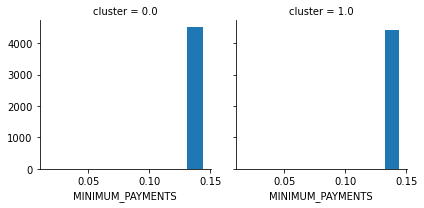

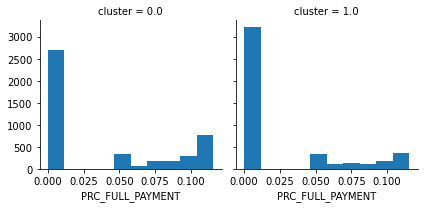

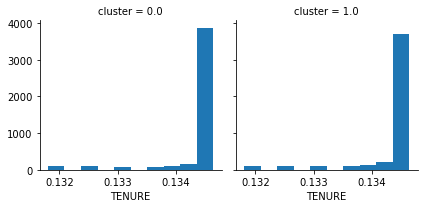

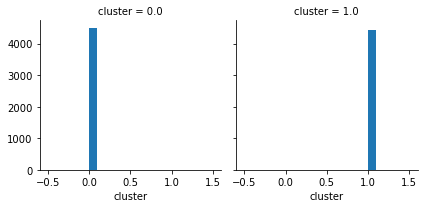

In [20]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Hasil barplot setiap feature berdasarkan cluster di atas menunjukkan bahwa karakteristik utama yang membedakan cluster 0 dan cluster 1 terdapat pada variabel / feature 'PURCHASES_FREQUENCY'. Dimana cluster 0 memiliki kecenderungan jumlah pembelian yang dilakukan lebih tinggi dibandingkan pada cluster 1.

# Evaluation

In [21]:
# Mengevaluasi cluster berdasarkan nilai jarak antar cluster.
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(data_red)

print('Silhoutte score of our model is ' + str(silhouette_score(data_red, kmeans.labels_)))

Silhoutte score of our model is 0.6351670955426072


Nilai Silhoutte score menunjukkan seberapa jauh jarak pemisah antar cluster. Semakin tinggi Silhouette Coefficients (semakin mendekati +1), semakin jauh sampel cluster dari sampel cluster tetangga. Hasil silhoutte score pada model yang dibuat sebesar 0.63 dimana nilai tersebut merupakan nilai silhoutte score tertinggi dibandingkan dengan nilai silhoutte score pada jumlah cluster lainnya.

# Interpretation and Conclusion

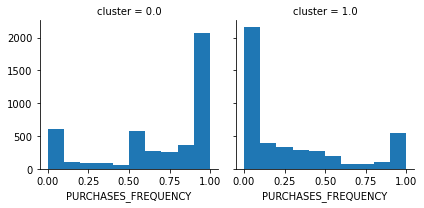
Hasil modeling clustering customer berdasarkan credit card data set menunjukaan bahwa customer dapat dikategorikan kedalam dua cluster yang berbeda. Clustering tersebut didasarkan pada variabel 'PURCHASES_FREQUENCY' dimana :
1. Cluster 0 merupakan cluster consumer yang memiliki karakteristik transaksi pembelian yang tinggi.
2. Cluster 1 merupakan cluster consumer yang memiliki karakteristik transaksi pembelian yang rendah

Hasil clustering diatas dapat dijadikan sebagai acuan atau dasar bagi perusahaan dalam pengambilan kebijakan Customer segmentation. Tujuannya perusahaan penyedia credit card dapat mengambil strategi bisnis yang tepat berdasarkan sifat dan karakteristik customer yang diperoleh diatas